# Loading the required Libraries

In [78]:
#General Libraries
import warnings
warnings.filterwarnings("ignore")

#Data preprocessing & Visualization
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import math

# Sampling for train - test
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Setting the working path

In [6]:
os.chdir(r"C:\Users\1198472\Desktop")
os.getcwd()

'C:\\Users\\1198472\\Desktop'

# Loading the data to dataframe


In [7]:
## Load Data
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [8]:
## Check data in the dataset abesnteeism_data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [9]:
df.shape

(740, 21)

In [10]:
##Check datatypes of columns
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [11]:
##Check summary of the data 
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


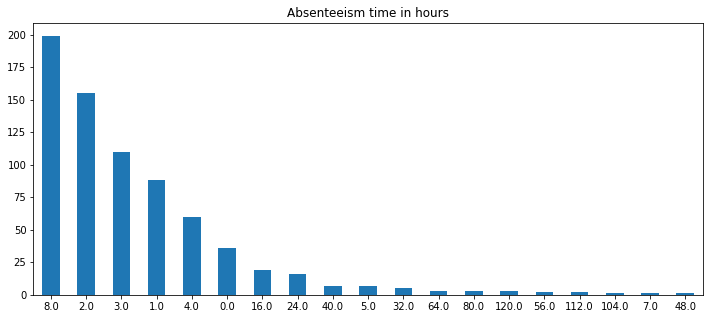

In [12]:
(df["Absenteeism time in hours"].value_counts().
 plot(kind='bar', title= "Absenteeism time in hours" , rot = 'horizontal', figsize = (12,5)))

# Summary

1. More no.of persons (~200) are absent for 8 hours.
2. Less no.of persons (~10) are absent for 48 hours.
3. Highest no.of hours a few persons are absent from work is 120 hours.

In [13]:
## Separate features into categorical and numerical data set

categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]
numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]
## Converting categorical_set data into category types from int/float
for i in categorical_set :
    df[i] = df[i].astype("category")

In [14]:
##Check datatypes of columns
df.dtypes

ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                 float64
Social drinker                     category
Social smoker                      category
Pet                                 float64
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [15]:
## In our data set if the below features has 0 as the value ,since it is  practically not  an acceptable value, we will replace it with NA
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index"]:
        df[i] = df[i].replace(0,np.nan)

# Summary:
1. Convert the datatypes to required datatypes
2. Replaced the illegal 0 values to NaN on certain columns where 0's are not acceptable 
3. Identified the target variable and its type.
4. Target variable is a continous variable, So regression problem.
5. Models used for regression problems
        a. Linear regression
        b. Decision tree
        c. Random forests
        d. XGboost etc..
    
6. Metrics used for regression problems
        a. RMSE
        b. MSE
        c. R-squared etc...

# Missing Value Analysis

In [16]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

                          Variables  Missing_percentage
0                Reason for absence            6.216216
1                   Body mass index            4.189189
2         Absenteeism time in hours            2.972973
3                            Height            1.891892
4            Work load Average/day             1.351351
5                         Education            1.351351
6            Transportation expense            0.945946
7                               Son            0.810811
8              Disciplinary failure            0.810811
9                        Hit target            0.810811
10                    Social smoker            0.540541
11                 Month of absence            0.540541
12                              Age            0.405405
13                     Service time            0.405405
14  Distance from Residence to Work            0.405405
15                   Social drinker            0.405405
16                              Pet            0

In [17]:
##If any feature has more than 30% of missing data then drop that column else perform missing value analysis   
for i in range(0,len(missing_val)):
    if(missing_val['Missing_percentage'][i]>=30):
        df.drop([i],axis = 1)


In [18]:
# Manual checking of best method for imputation.

data = df.copy()
column = 'Body mass index'
row = 122
print(f"Selected column : {column}\nSelected row no. : {row}")

x = data[column].loc[row]
print("Actual value : ",x)
data[column].loc[row] = np.nan

#Mean Imputation
data[column] = data[column].fillna(data[column].mean())
print("Mean Imputation : ",data[column].loc[row])
data[column].loc[row] = np.nan

#Median Imputation
data[column] = data[column].fillna(data[column].median())
print("Median Imputation : ",data[column].loc[row])
data[column].loc[row] = np.nan


#KNN imputation - Got some error while installing the "pip install fancyimpute".
#df = pd.DataFrame(KNN(k = 1).fit_transform(data), columns = data.columns)
#print("KNN imputation : ",data[column].loc[row])
#data[column].loc[row]  = x

Selected column : Body mass index
Selected row no. : 122
Actual value :  24.0
Mean Imputation :  26.687853107344633
Median Imputation :  25.0


In [19]:
#### Missing value analysis
## Mean mode median method 
## Mean for numerical features
##Mode for categorical features
def Null_value_impute(data_set, method):
    for i in data_set.columns.values:
        # mean method of imputing
        if (data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64') and method == 'mean':
            data_set[i] = round(data_set[i].fillna(data_set[i].mean()))

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
        
        # median method of imputing
        elif data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64' and method == 'median':
            data_set[i] = data_set[i].fillna(data_set[i].median())
        
        # KNN method of imputing
        else:
            data_set = pd.DataFrame(KNN(k=3).complete(data_set),columns = data_set.columns)
            
    return data_set[0:5]

In [20]:
Null_value_impute(df, method = 'median')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,23.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [21]:
if df.isnull().sum().all() == 0:
    print("There are No Null values")
else:
    print("Still there are Null values")

There are No Null values


# Data Visualisation

### Numerical set

Text(0.5, 1.0, 'Histogram of ID')

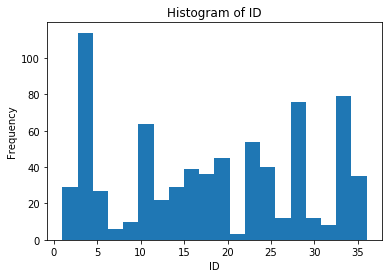

In [22]:
%matplotlib inline
plt.hist(df['ID'],bins = 20)
plt.xlabel("ID")
plt.ylabel("Frequency")
plt.title("Histogram of ID")

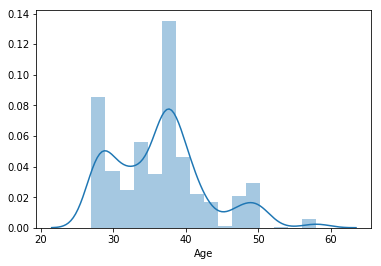

In [23]:
sns.distplot(df['Age'])

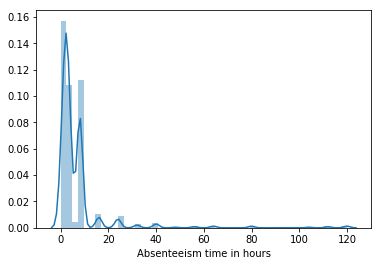

In [24]:
sns.distplot(df['Absenteeism time in hours'])


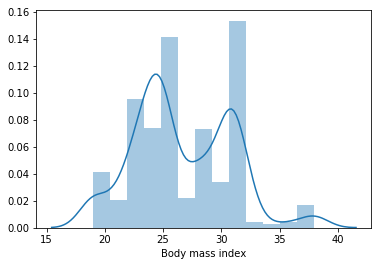

In [25]:
sns.distplot(df['Body mass index'])



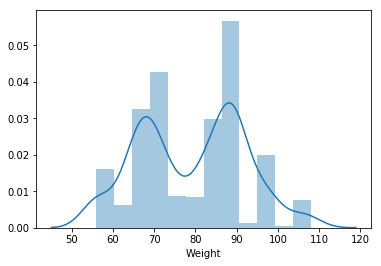

In [26]:
sns.distplot(df['Weight'])


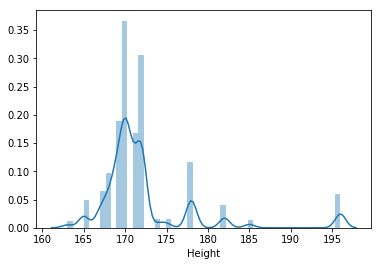

In [27]:
sns.distplot(df['Height'])


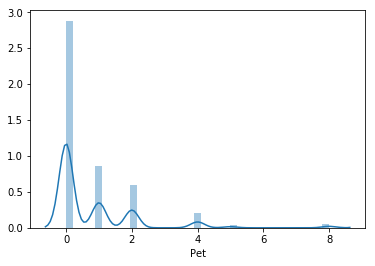

In [28]:
sns.distplot(df['Pet'])


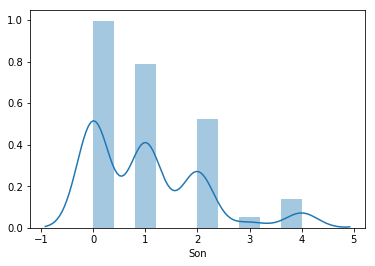

In [29]:
sns.distplot(df['Son'])


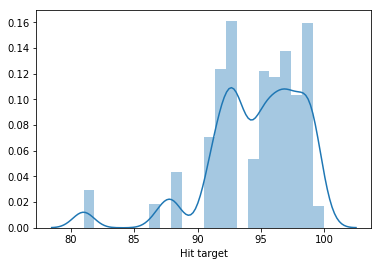

In [30]:
sns.distplot(df['Hit target'])


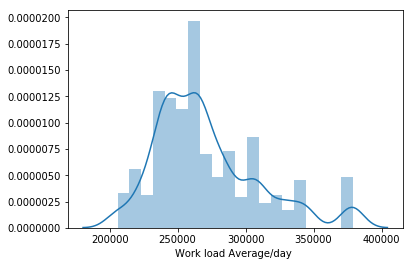

In [31]:
sns.distplot(df['Work load Average/day '])


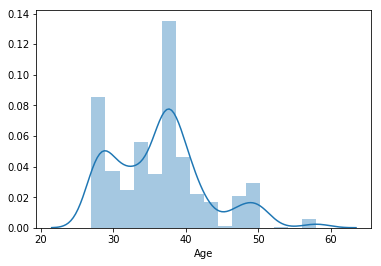

In [32]:
sns.distplot(df['Age'])

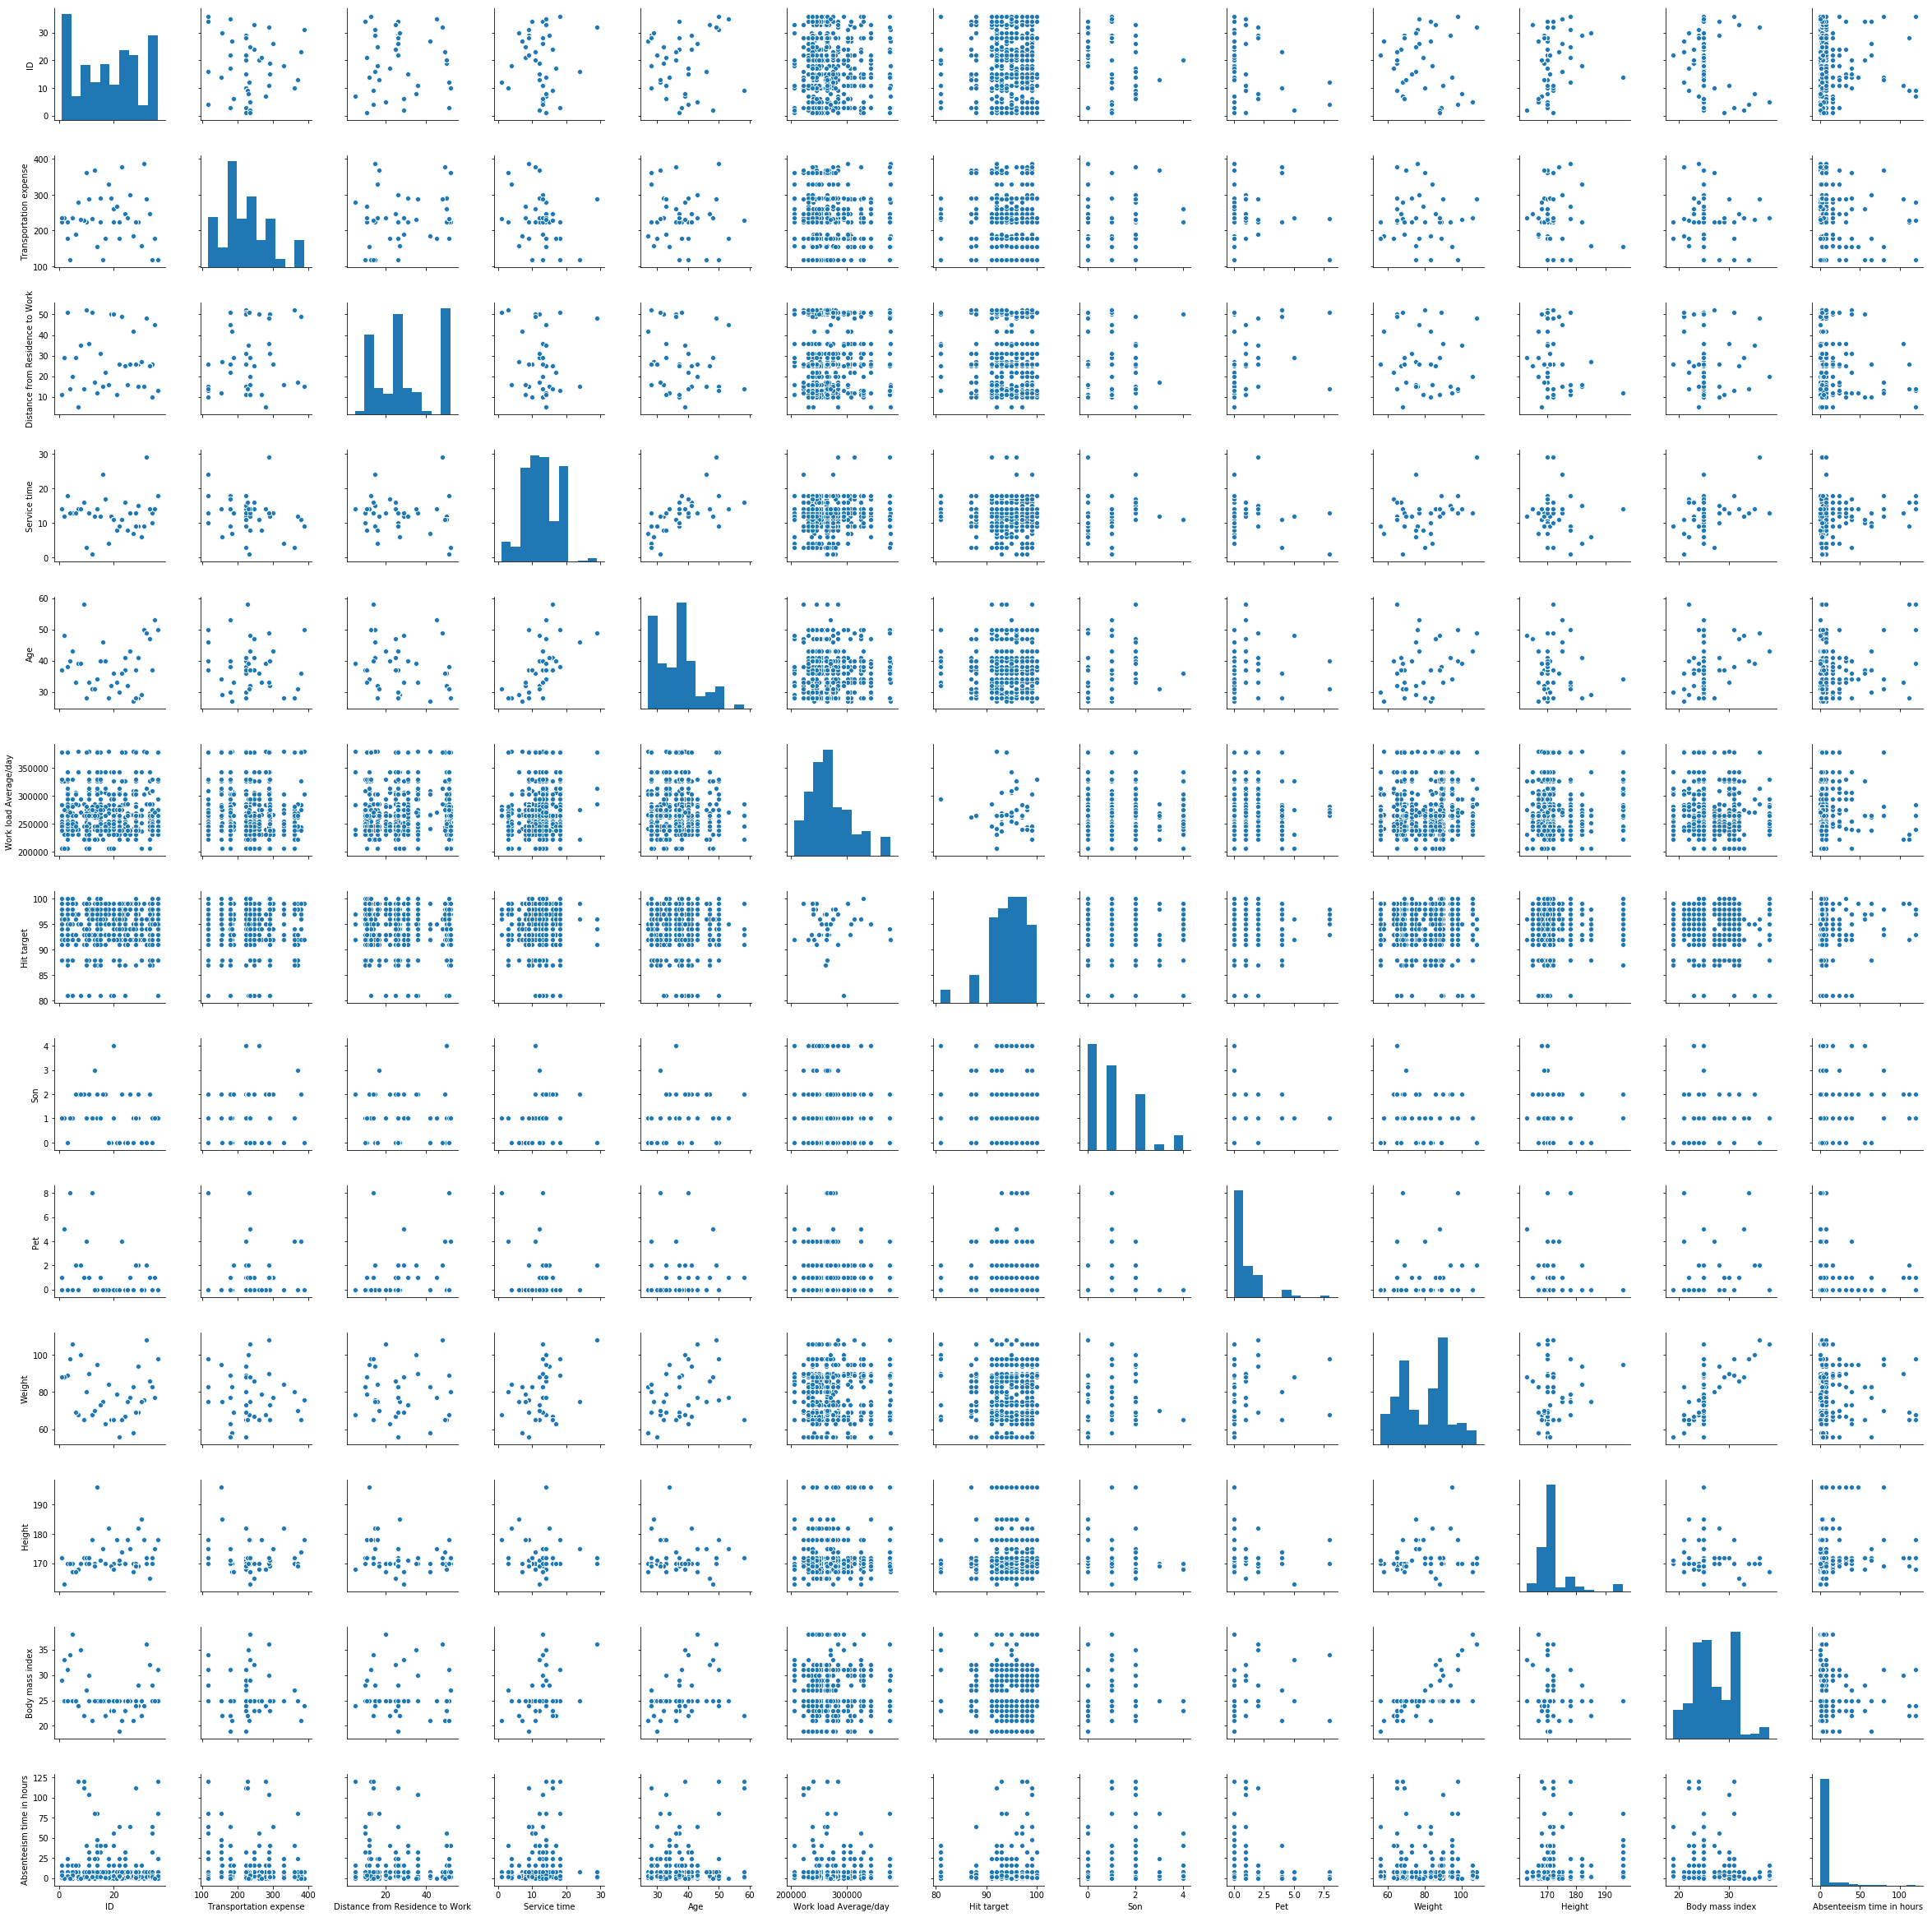

In [33]:
%matplotlib inline
sns.pairplot(df[numerical_set[0:13]])

# Summary:
1. Most of the people are in the age of 30-40 years with workload average of 250000/day and 95-100% succesful delivery rate
2. Most people are in the height range of 170 CM, weight ranges of 60-70 & 80-90KG's with BMI ranges 20 - 30

### Categorical feature set

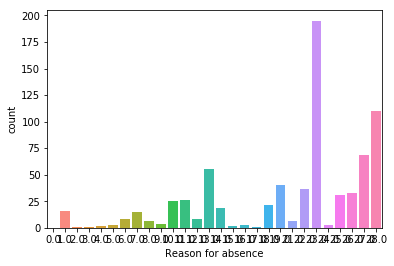

In [34]:
ax = sns.countplot(df["Reason for absence"],saturation=1)

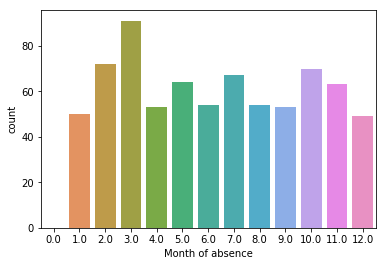

In [35]:
sns.countplot(df["Month of absence"])

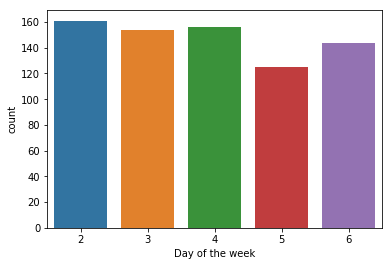

In [36]:
sns.countplot(df["Day of the week"])

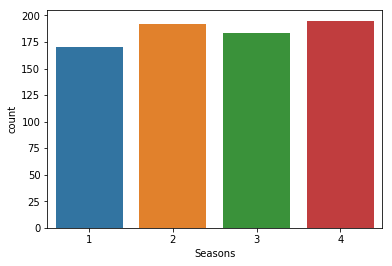

In [37]:
sns.countplot(df["Seasons"])

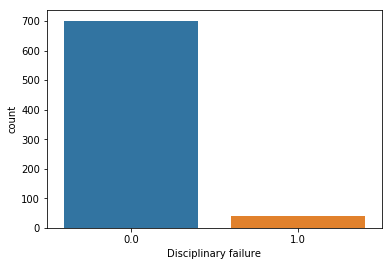

In [38]:
sns.countplot(df["Disciplinary failure"])

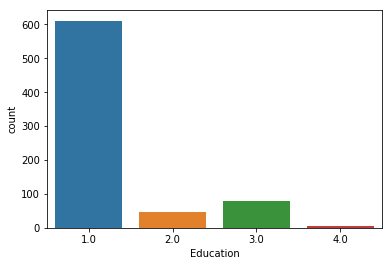

In [39]:
sns.countplot(df["Education"])

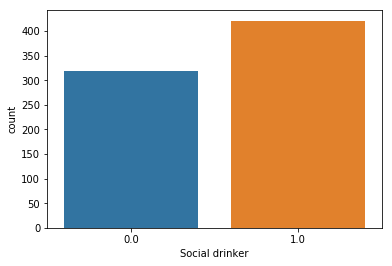

In [40]:
sns.countplot(df["Social drinker"])

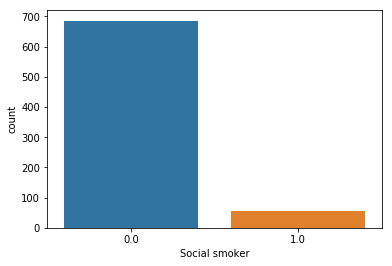

In [41]:
sns.countplot(df["Social smoker"])

Categorical feature set vs Target variable

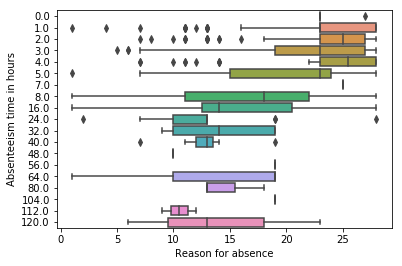

In [42]:
sns.boxplot(df['Reason for absence'],df['Absenteeism time in hours'], orient="h")

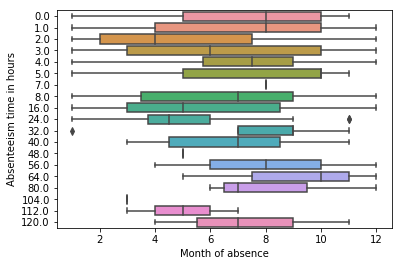

In [43]:
%matplotlib inline
sns.boxplot(df['Month of absence'],df['Absenteeism time in hours'], orient="h")

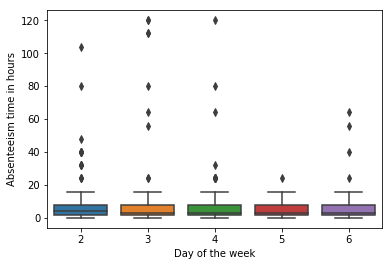

In [44]:
sns.boxplot(df['Day of the week'],df['Absenteeism time in hours'])

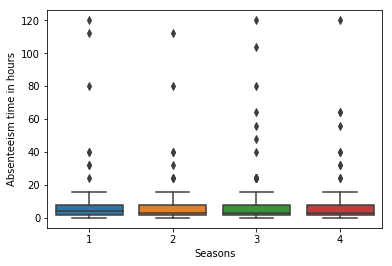

In [45]:
sns.boxplot(df['Seasons'],df['Absenteeism time in hours'])

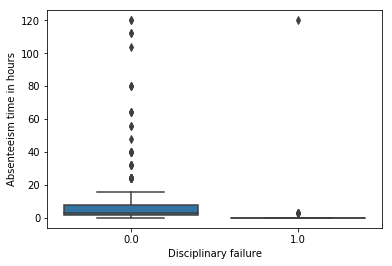

In [46]:
%matplotlib inline
sns.boxplot(df['Disciplinary failure'],df['Absenteeism time in hours'])

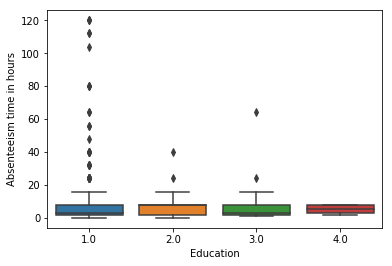

In [47]:
sns.boxplot(df['Education'],df['Absenteeism time in hours'])

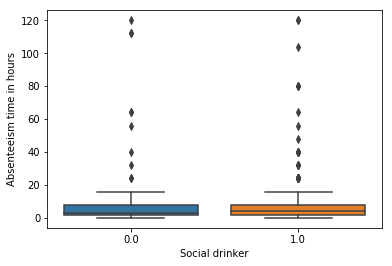

In [48]:
sns.boxplot(df['Social drinker'],df['Absenteeism time in hours'])

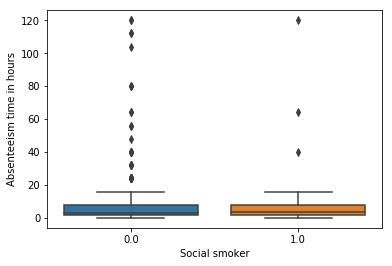

In [49]:
sns.boxplot(df['Social smoker'],df['Absenteeism time in hours'])

# Summary:
# 1. What changes company should bring to reduce the number of absenteeism?
###### Company should bring a good medical plan for their employess, reduce the workload on each employees by recruting the people and motivate the people towards work by providing rewards or incentives on timely basis.

##### Summary from the visualization:

Absenteeism time in hours:

    More no.of persons (200) are absent for 8 hours.
    Less no.of persons (~10) are absent for 48 hours.
    Highest no.of hours a few persons are absent from work is 120 hours.

Numerical data sumary:

    Most of the people are in the age of 30-40 years with workload average of 250000/day and 95-100% succesful delivery rate
    Most people are in the height range of 170 CM, weight ranges of 60-70 & 80-90KG's with BMI ranges 20 - 30

Categorical data summary:

    Most no of people said the reason as medical consultation (23) for their absent.
    We can see more no of absents in the march month.
    Almost everyday, there are 140-160 are getting absent to work. This is same for every season
    Most of the people who work are from high school education and there are very less no of persons from master graduate & doctor's
    There are more drinkers than smokers.
    We cann see lot of outliers in the data that should be cleaned are modified.
   

# Outlier Analysis

In [50]:
##Outlier analysis
## Replace outliers with NaN
for i in numerical_set:
    q75,q25 = np.percentile(df[i],[75,25])
    iqr = q75-q25
    min_bar = (q25-(1.5*iqr))
    max_bar = (q75+(1.5*iqr))
    print(f"{i} : min({min_bar}), max({max_bar})")
    print("-"*50)
    df.loc[df[i]<min_bar,i] = np.nan
    df.loc[df[i]>max_bar,i] = np.nan    

ID : min(-19.5), max(56.5)
--------------------------------------------------
Transportation expense : min(57.5), max(381.5)
--------------------------------------------------
Distance from Residence to Work : min(-35.0), max(101.0)
--------------------------------------------------
Service time : min(-1.5), max(26.5)
--------------------------------------------------
Age : min(17.5), max(53.5)
--------------------------------------------------
Work load Average/day  : min(183688.0), max(345552.0)
--------------------------------------------------
Hit target : min(87.0), max(103.0)
--------------------------------------------------
Son : min(-3.0), max(5.0)
--------------------------------------------------
Pet : min(-1.5), max(2.5)
--------------------------------------------------
Weight : min(39.0), max(119.0)
--------------------------------------------------
Height : min(164.5), max(176.5)
--------------------------------------------------
Body mass index : min(13.5), max(41.5)
--

In [51]:
#impute NaN with median mode 
## median mode method for imputation
Null_value_impute(df, method = 'median')
#df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,23.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,170.0,31.0,0.0
2,3.0,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Feature Selection

### Correlation Analysis

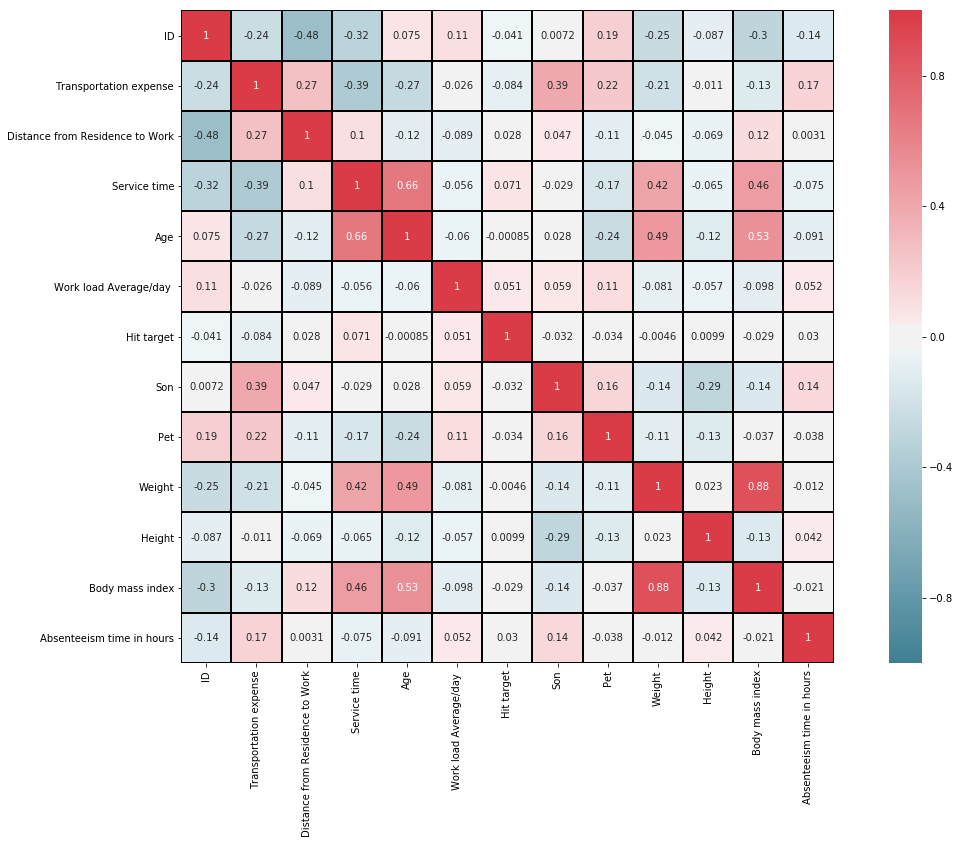

In [52]:
#let us see the correlation
data_corr=df.loc[:,numerical_set]

#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,12)) 

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

### VIF(Variance Inflation Factor)

In [53]:
#Multicollinearity check - VIF
X = df[numerical_set].assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
#only Weight and Body mass index has VIF >5 .Thus we will remove one of them

ID                                     2.555528
Transportation expense                 2.199472
Distance from Residence to Work        1.593952
Service time                           3.443374
Age                                    3.501619
Work load Average/day                  1.042375
Hit target                             1.024523
Son                                    1.532156
Pet                                    1.458590
Weight                                 6.039502
Height                                 1.328574
Body mass index                        7.227522
Absenteeism time in hours              1.082891
const                              14722.123211
dtype: float64

In [54]:
## Performing one way ANOVA on categorical dataset
for i in categorical_set:
    print(i) 
    print(stats.f_oneway(df[i],df['Absenteeism time in hours']))
    print("="*50)


Reason for absence
F_onewayResult(statistic=3326.088836175677, pvalue=0.0)
Month of absence
F_onewayResult(statistic=149.391598795114, pvalue=8.502044431590593e-33)
Day of the week
F_onewayResult(statistic=4.344633101981018, pvalue=0.03729711354406971)
Seasons
F_onewayResult(statistic=164.8759113241966, pvalue=7.43274223297258e-36)
Disciplinary failure
F_onewayResult(statistic=1154.6532791575944, pvalue=1.6372426248884337e-187)
Education
F_onewayResult(statistic=546.5398916261591, pvalue=4.1194026059897665e-103)
Social drinker
F_onewayResult(statistic=869.0362524023035, pvalue=1.2809993353034328e-150)
Social smoker
F_onewayResult(statistic=1141.5220610928714, pvalue=6.6118550765910436e-186)


### Dimension reduction

# Chi square test
from scipy.stats import ttest_1samp
import numpy as np

print(df['passenger_count'].head())
passenger_count_mean = np.mean(df['passenger_count'].values)
print(passenger_count_mean)
tset, pval = ttest_1samp(passenger_count_mean, 4)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

In [55]:
## Dimension reduction
df = df.drop(["Weight","Day of the week","Seasons","Education","Social smoker","Social drinker"],axis = 1)
df.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,4.0
1,36.0,23.0,7.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,0.0,170.0,31.0,0.0
2,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,0.0,170.0,31.0,2.0
3,7.0,7.0,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,2.0,0.0,168.0,24.0,4.0
4,11.0,23.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,2.0


Metrics in Crossvalidation:
    https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

# Sampling or Train- test split

In [56]:
df.dtypes

ID                                  float64
Reason for absence                 category
Month of absence                   category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Son                                 float64
Pet                                 float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [57]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Son                                0
Pet                                0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [58]:
for i in df.columns.values:
    df[i] = df[i].astype('float')
    
df.dtypes

ID                                 float64
Reason for absence                 float64
Month of absence                   float64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Son                                float64
Pet                                float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [59]:
df_final = df.copy()
Y = df_final['Absenteeism time in hours'].values
df_final.drop('Absenteeism time in hours', axis=1, inplace=True)
X = df_final

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Splitting train & test data.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# this is Stratified splitting
print('Train shape:',X_train.shape, y_train.shape)
print('Test Shape:',X_test.shape, y_test.shape)
print("="*100)

Train shape: (495, 14) (495,)
Test Shape: (245, 14) (245,)


# Model Development

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [61]:
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test

In [62]:
def model_and_metrics(X_train, y_train, X_test, y_test, model):

    """ Common function for Model BuildUP & metrics """
    
    print("===================Building the model... ===========================")
    model = model
    #Train the algorithm
    model.fit(X_train, y_train)
    # predict the response
    y_pred = model.predict(X_test)
    print("Model {} ran successfully..".format(model))
    print('\n')

    print("======================== Score's ===================================")
    print('r square : ', metrics.r2_score(y_test, y_pred))
    print('Adjusted r square : {}'.format(1 - (1-metrics.r2_score(y_test, y_pred))*
                                          (len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)))
    print('MSE :', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# LinearRegression

In [63]:
model = LinearRegression()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) ran successfully..


======================== Score's ===================================
r square :  0.1619149462136349
Adjusted r square : 0.11090107337446486
MSE : 7.563276053740129
RMSE : 2.7501410970603177


# LinearRegression with statsmodels

In [64]:
import statsmodels.api as sm
modelLR = sm.OLS(y_train,X_train,data = df_final).fit()
print(modelLR.summary())
## Predict 
predictLR = modelLR.predict(X_test)
#RMSE
print(f"RMSE value : {math.sqrt(mean_squared_error(y_test,predictLR))}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     84.70
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          5.93e-120
Time:                        17:27:27   Log-Likelihood:                -1237.9
No. Observations:                 495   AIC:                             2504.
Df Residuals:                     481   BIC:                             2563.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID        

# Ridge

In [65]:
model = Ridge()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) ran successfully..


======================== Score's ===================================
r square :  0.16290132541040903
Adjusted r square : 0.11194749304408602
MSE : 7.55437450117674
RMSE : 2.7485222395274045


# Lasso

In [66]:
model = Lasso()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) ran successfully..


======================== Score's ===================================
r square :  0.10909471500822399
Adjusted r square : 0.05486569766089855
MSE : 8.039950811300876
RMSE : 2.8354807019799795


# KNeighborsRegressor

In [67]:
model = KNeighborsRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') ran successfully..


======================== Score's ===================================
r square :  -0.19719804908306182
Adjusted r square : -0.270070973809857
MSE : 10.80408163265306
RMSE : 3.286956287000644


# DecisionTreeRegressor

In [68]:
model = DecisionTreeRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') ran successfully..


======================== Score's ===================================
r square :  -0.6504395413528308
Adjusted r square : -0.7509010786525685
MSE : 14.894347303849734
RMSE : 3.859319538966647


# RandomForestRegressor

In [69]:
model = RandomForestRegressor(max_depth=2,n_estimators=10,random_state=0,max_features=10)
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False) ran successfully..


======================== Score's ===================================
r square :  0.21175865984268571
Adjusted r square : 0.16377875218093607
MSE : 7.1134627990866495
RMSE : 2.667107571712594


# XGBRegressor

In [70]:
model = XGBRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
[17:28:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1) ran successfully..


======================== Score's ===================================
r square :  0.2517689470391494
Adjusted r square : 0.20622444816327157
MSE : 6.752391037110787
RMSE : 2.5985363259171086


# Chossing the best model and Deployment: 

# XGBRegressor

In [71]:
model = XGBRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
[17:28:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1) ran successfully..


======================== Score's ===================================
r square :  0.2517689470391494
Adjusted r square : 0.20622444816327157
MSE : 6.752391037110787
RMSE : 2.5985363259171086


In [72]:
import pickle

# Save the model as a pickle in a file 
model_file = open('Absent_model.pkl', 'ab')
pickle.dump(model, model_file) 
model_file.close()

# # Load the model from the file 
# model_from_pickle = pickle.load('cab_fare_model.pkl')

# Summary:
Out of all the models, XGBoost gave the best results with an RMSE value of 2.59. So we can use XGboost for this problem.

# 2. How much losses every month can we project in 2011 if same trend of absenteeism continues?

Considering

###### work loss in Hours = (Work load Average/day/Service time)*Absenteeism time in hours

In [73]:
#df.columns.values
loss_data = df[["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]]

In [74]:
loss_data["Work Loss"]=(df["Work load Average/day "]/df["Service time"])*df["Absenteeism time in hours"]
loss_data.head()

,Month of absence,Work load Average/day,Service time,Absenteeism time in hours,Work Loss
0,7.0,239554.0,13.0,4.0,73708.923077
1,7.0,239554.0,18.0,0.0,0.000000
2,7.0,239554.0,18.0,2.0,26617.111111
3,7.0,239554.0,14.0,4.0,68444.000000
4,7.0,239554.0,13.0,2.0,36854.461538


In [75]:
monthly_loss = loss_data[["Month of absence","Work Loss"]]

In [76]:
monthly_loss = monthly_loss.groupby("Month of absence").sum()
monthly_loss

,Work Loss
Month of absence,
1.0,4.730330e+06
2.0,7.938029e+06
3.0,1.023768e+07
4.0,6.140413e+06
5.0,6.341453e+06
6.0,1.003318e+07
7.0,1.143110e+07
8.0,6.520187e+06
9.0,4.159296e+06


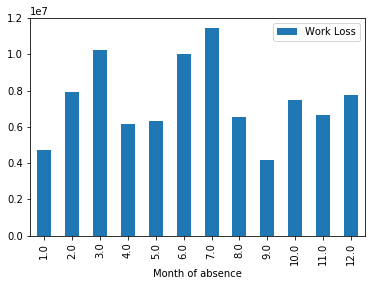

In [77]:
monthly_loss.plot(kind='bar')

# Final Summary:
    Work loss for 2011 ,considering the same trend in the absenteeism pattern is shown above
    
    Below are the absent no.of hours for all the employees.
    We can see july month has more no.of absent hours.